1 2
2 5
3 4
4 3
5 4
6 1
7 5
-------------------------
1 2
2 5
7 5
-------------------------
1 2
6 1
7 5


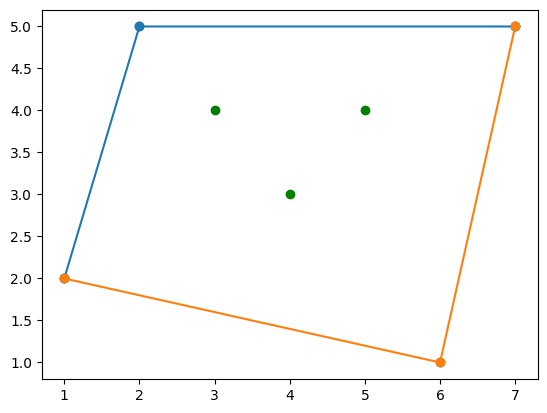

In [6]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

class pair:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __lt__(self, other):
        if (self.x==other.x):
            return self.y<other.y
        return self.x<other.x
    def __str__(self):
        return str(round(self.x,2))+" "+str(round(self.y,2))
def det(a, b, c):
    p = [[1,1,1]]
    p.append([a.x,b.x,c.x])
    p.append([a.y,b.y,c.y])
    p = np.array(p)
    p = np.transpose(p)
    # Xây dựng ma trận p để tính định thức
    # Sử dụng quy tắc sarrus để tính định thức ma trận 3x3
    res = 0
    for i in range(3):
        t = 1
        for j in range(3):
            t*= p[j][(i+j)%3]
        res+=t
        # res là định thức, lấy tổng các tích các phần tử song song với đường chéo chính
    for i in range(3):
        t = 1
        for j in range(3):
            t*= p[j][(i-j+3)%3]
        res-=t
        # trừ đi tổng các tích các phần tử song song với đường chéo phụ
    return res

size = 7
p = [pair(1,2),pair(2,5),pair(3,4), pair(4,3), pair(5,4),
pair(6,1), pair(7,5)]
p.sort() # sắp xếp lại danh sách các điểm nói trên (danh sách nhập vào đã được sắp xếp sẵn)

for x in p:
    print(x)
print("-------------------------")

upcv = [p[0]] # danh sách các phần tử bao lồi phía trên
downcv = [p[0]] # danh sách các phần tử bao lồi phía dưới
for i in range(1,size):
    while(len(upcv)>=2):
        # nếu độ dài của danh sách bao lồi trên nhiều hơn 1 phần tử
        back = len(upcv)
        d = det(upcv[back-2],upcv[back-1],p[i])
        # Tính hướng đi của 3 điểm
        if d<=0:
            break
            # Dừng vòng lặp lại nếu xác định điểm tiếp theo sẽ rẽ phải
        else:
            upcv.pop()
            # Nếu rẽ trái, xoá phần tử cuối cùng và tiếp tục vòng lặp
    upcv.append(p[i])
for i in range(1,size):
    while(len(downcv)>=2):
        # nếu độ dài của danh sách bao lồi trên nhiều hơn 1 phần tử
        back = len(downcv)
        d = det(downcv[back-2],downcv[back-1],p[i])
        # Tính hướng đi của 3 điểm
        if d>=0:
            break
            # Dừng vòng lặp lại nếu xác định điểm tiếp theo sẽ rẽ trái
        else:
            downcv.pop()
            # Nếu rẽ phải, xoá phần tử cuối cùng và tiếp tục vòng lặp
    downcv.append(p[i])

# từ dòng này, code dùng để hiển thị ra màn hình
for x in upcv:
    print(x)
print("-------------------------")
for y in downcv:
    print(y)
x = []
y = []
for pp in p:
    x.append(pp.x)
    y.append(pp.y)
plt.plot(x,y,'go')
x.clear()
y.clear()
for pp in upcv:
    x.append(pp.x)
    y.append(pp.y)
plt.plot(x,y,marker='o',linestyle ='-')
x.clear()
y.clear()
for pp in downcv:
    x.append(pp.x)
    y.append(pp.y)
plt.plot(x,y,marker='o',linestyle ='-')

plt.show()